In [2]:
# bring in libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
# Read in CSVs
city_raw = pd.read_csv("raw_data/city_data.csv")
ride_raw = pd.read_csv("raw_data/ride_data.csv")

#look at data
city_raw.head(1)

,city,driver_count,type
0,Kelseyland,63,Urban


In [130]:
#look at data
ride_raw.head(1)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038


In [131]:
# aggregate data to a city level
city_groups = ride_raw.groupby('city')
city_cost = city_groups['fare'].sum()/city_groups['ride_id'].count()
city_cost = city_cost.to_frame().reset_index()
city_cost.columns = ['city', 'avg_fare']
#city_cost.head()

city_rides = city_groups['ride_id'].count()
city_rides = city_rides.to_frame().reset_index()
city_rides.columns = ['city', 'rides']
#city_rides.head()

#print(type(city_cost))

combined_city1 = pd.merge(city_cost, city_rides, on='city')
#combined_city1.head()

total_city = pd.merge(combined_city1, city_raw, on='city')
total_city.head(1)

,city,avg_fare,rides,driver_count,type
0,Alvarezhaven,23.92871,31,21,Urban


In [72]:
# seperate city data by city type
urban_df = total_city.loc[total_city["type"] == "Urban"]
suburban_df = total_city.loc[total_city["type"] == "Suburban"]
rural_df = total_city.loc[total_city["type"] == "Rural"]

In [138]:
#build series for each city in city type data set
u_city = urban_df["city"]
u_avg_fare = urban_df["avg_fare"]
u_rides = urban_df["rides"]
u_driver_count = urban_df["driver_count"]

s_city = suburban_df["city"]
s_avg_fare = suburban_df["avg_fare"]
s_rides = suburban_df["rides"]
s_driver_count = suburban_df["driver_count"]

r_city = rural_df["city"]
r_avg_fare = rural_df["avg_fare"]
r_rides = rural_df["rides"]
r_driver_count = rural_df["driver_count"]

Text(0,0.5,'Avg Ride Cost')

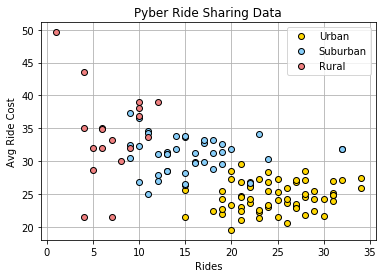

In [139]:
#plot data and legeng
plt.grid()
urban, = plt.plot(u_rides, u_avg_fare, 'o', color='gold', markeredgecolor='black', label="Urban")
suburban, = plt.plot(s_rides, s_avg_fare, 'o', color='lightskyblue', markeredgecolor='black', label="Suburban")
rural, = plt.plot(r_rides, r_avg_fare, 'o', color='lightcoral', markeredgecolor='black', label="Rural")

plt.legend(handles=[urban, suburban, rural], loc="best")
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Rides")
plt.ylabel("Avg Ride Cost")
plt.savefig("Ride_Sharing.png")

In [132]:
#organize data by city type
city_groups = total_city.groupby(['type'])

city_sums = city_groups.sum()
city_sums = city_sums.reset_index()
#city_sums.head(3)

city_types = city_sums["type"]
city_total_fare = city_sums["avg_fare"]
city_rides = city_sums["rides"]
city_drivers = city_sums["driver_count"]

colors = ["gold", "lightcoral", "lightskyblue"]
#city_types

Text(0.5,1,'% of Total Rides by City Type')

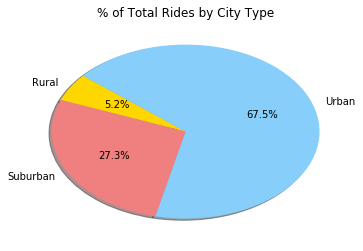

In [133]:
# plot pie chart for total rides share
plt.pie(city_rides, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

plt.savefig("Total_Rides.png")

Text(0.5,1,'% of Total Fares by City Type')

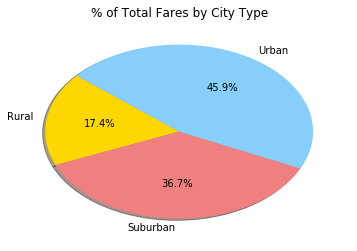

In [136]:
# plot chart for total fare shares
plt.pie(city_total_fare, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

plt.savefig("Total_Fares.png")

Text(0.5,1,'% of Total Drivers by City Type')

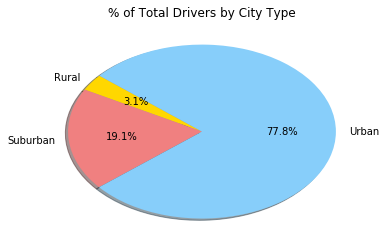

In [137]:
# plot data for total drivers share
plt.pie(city_drivers, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

plt.savefig("Total_Drivers.png")